<a href="https://colab.research.google.com/github/Series-Parallel/Machine_in_Deep_Learning/blob/main/LSTM_by_Hand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

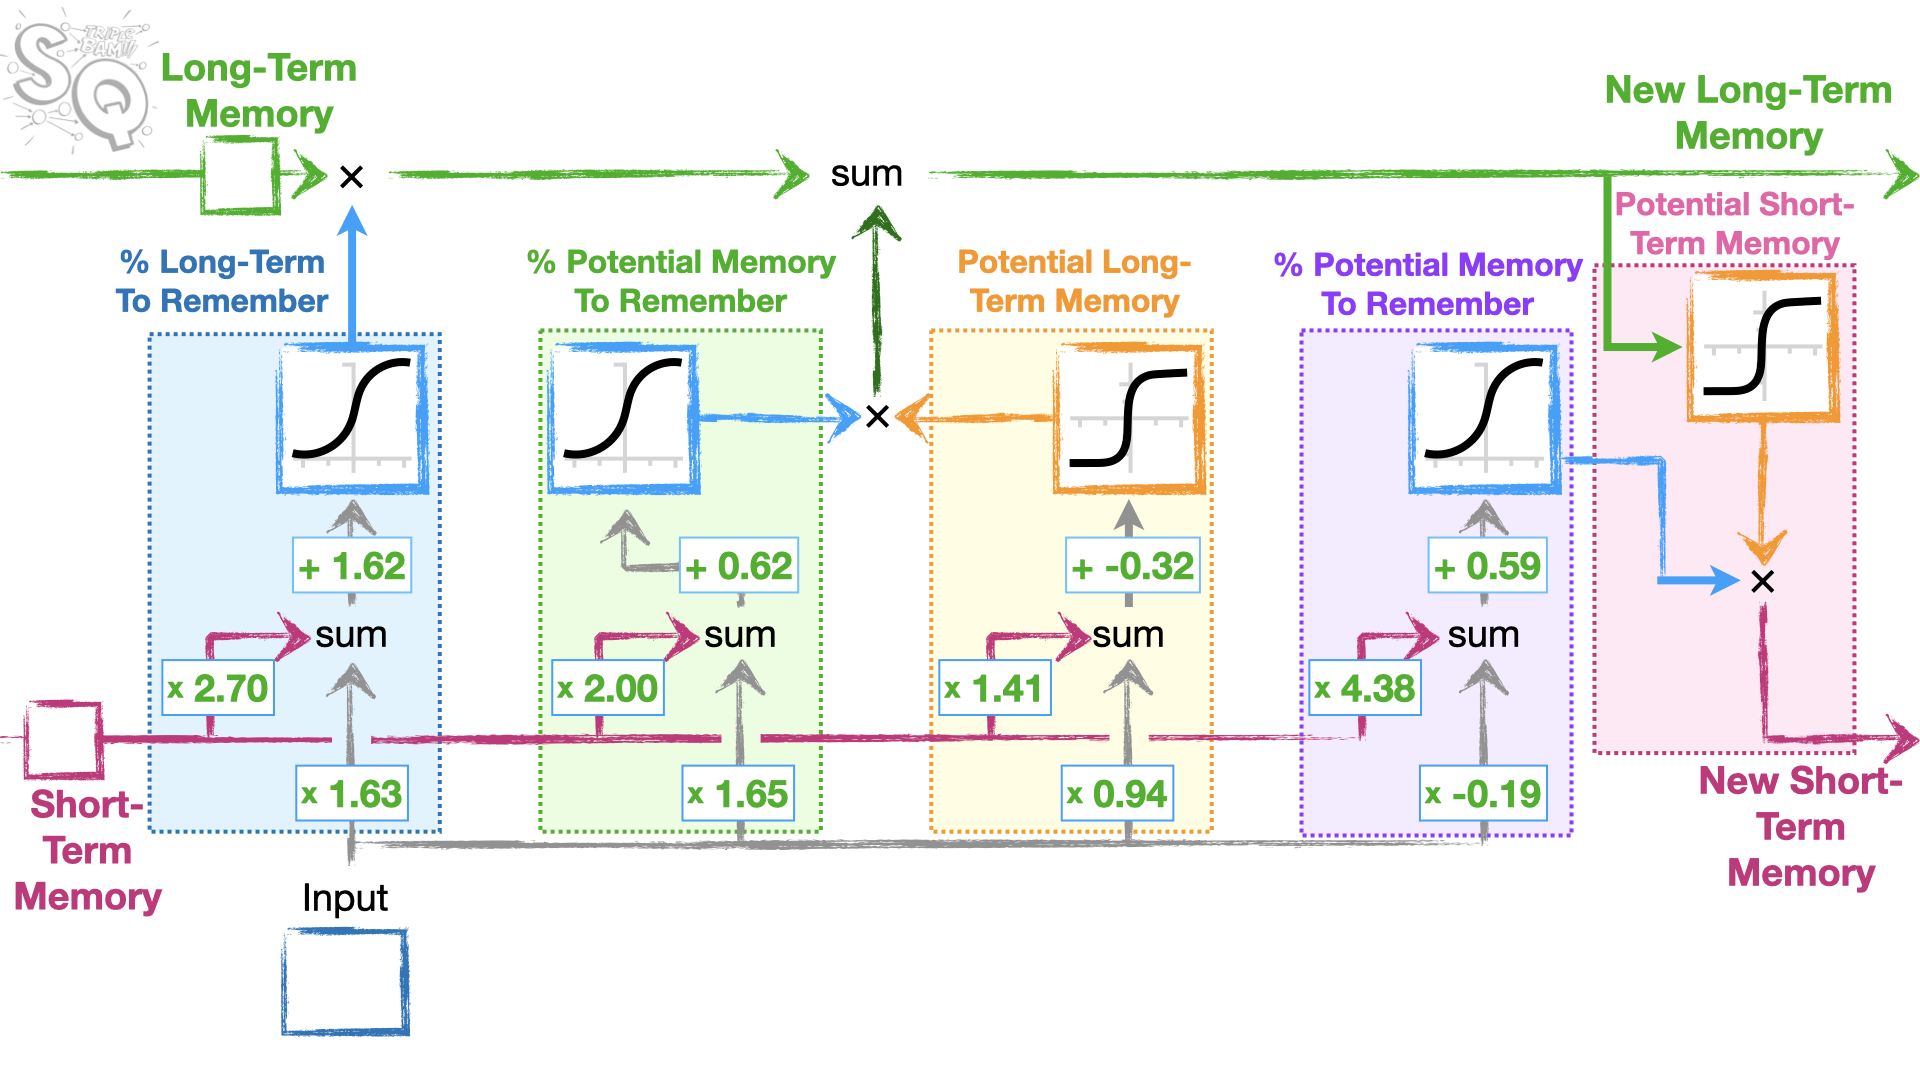

In [1]:
import pip
try:
  __import__("lightning")
except ImportError:
  pip.main(['install', "lightning"])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Collecting lightning

Downloading lightning-2.5.5-py3-none-any.whl.metadata (39 kB)

Requirement already satisfied: PyYAML<8.0,>5.4 in /usr/local/lib/python3.12/dist-packages (from lightning) (6.0.2)

Requirement already satisfied: fsspec<2027.0,>=2022.5.0 in /usr/local/lib/python3.12/dist-packages (from fsspec[http]<2027.0,>=2022.5.0->lightning) (2025.3.0)

Collecting lightning-utilities<2.0,>=0.10.0 (from lightning)

Downloading lightning_utilities-0.15.2-py3-none-any.whl.metadata (5.7 kB)

Requirement already satisfied: packaging<27.0,>=20.0 in /usr/local/lib/python3.12/dist-packages (from lightning) (25.0)

Requirement already satisfied: torch<4.0,>=2.1.0 in /usr/local/lib/python3.12/dist-packages (from lightning) (2.8.0+cu126)

Collecting torchmetrics<3.0,>0.7.0 (from lightning)

Downloading torchmetrics-1.8.2-py3-none-any.whl.metadata (22 kB)

Requirement already satisfied: tqdm<6.0,>=4.57.0 in /usr/local/lib/python3.12/dist-packages (from lightning) (4.67.1)

Requirement already satisfied: typing-extensions<6.0,>4.5.0 in /usr/local/lib/python3.12/dist-packages (from lightning) (4.15.0)

Collecting pytorch-lightning (from lightning)

Downloading pytorch_lightning-2.5.5-py3-none-any.whl.metadata (20 kB)

Requirement already satisfied: aiohttp!=4.0.0a0,!=4.0.0a1 in /usr/local/lib/python3.12/dist-packages (from fsspec[http]<2027.0,>=2022.5.0->lightning) (3.12.15)

Requirement already satisfied: setuptools in /usr/local/lib/python3.12/dist-packages (from lightning-utilities<2.0,>=0.10.0->lightning) (75.2.0)

Requirement already satisfied: filelock in /usr/local/lib/python3.12/dist-packages (from torch<4.0,>=2.1.0->lightning) (3.19.1)

Requirement already satisfied: sympy>=1.13.3 in /usr/local/lib/python3.12/dist-packages (from torch<4.0,>=2.1.0->lightning) (1.13.3)

Requirement already satisfied: networkx in /usr/local/lib/python3.12/dist-packages (from torch<4.0,>=2.1.0->lightning) (3.5)

Requirement already satisfied: jinja2 in /usr/local/lib/python3.12/dist-packages (from torch<4.0,>=2.1.0->lightning) (3.1.6)

Requirement already satisfied: nvidia-cuda-nvrtc-cu12==12.6.77 in /usr/local/lib/python3.12/dist-packages (from torch<4.0,>=2.1.0->lightning) (12.6.77)

Requirement already satisfied: nvidia-cuda-runtime-cu12==12.6.77 in /usr/local/lib/python3.12/dist-packages (from torch<4.0,>=2.1.0->lightning) (12.6.77)

Requirement already satisfied: nvidia-cuda-cupti-cu12==12.6.80 in /usr/local/lib/python3.12/dist-packages (from torch<4.0,>=2.1.0->lightning) (12.6.80)

Requirement already satisfied: nvidia-cudnn-cu12==9.10.2.21 in /usr/local/lib/python3.12/dist-packages (from torch<4.0,>=2.1.0->lightning) (9.10.2.21)

Requirement already satisfied: nvidia-cublas-cu12==12.6.4.1 in /usr/local/lib/python3.12/dist-packages (from torch<4.0,>=2.1.0->lightning) (12.6.4.1)

Requirement already satisfied: nvidia-cufft-cu12==11.3.0.4 in /usr/local/lib/python3.12/dist-packages (from torch<4.0,>=2.1.0->lightning) (11.3.0.4)

Requirement already satisfied: nvidia-curand-cu12==10.3.7.77 in /usr/local/lib/python3.12/dist-packages (from torch<4.0,>=2.1.0->lightning) (10.3.7.77)

Requirement already satisfied: nvidia-cusolver-cu12==11.7.1.2 in /usr/local/lib/python3.12/dist-packages (from torch<4.0,>=2.1.0->lightning) (11.7.1.2)

Requirement already satisfied: nvidia-cusparse-cu12==12.5.4.2 in /usr/local/lib/python3.12/dist-packages (from torch<4.0,>=2.1.0->lightning) (12.5.4.2)

Requirement already satisfied: nvidia-cusparselt-cu12==0.7.1 in /usr/local/lib/python3.12/dist-packages (from torch<4.0,>=2.1.0->lightning) (0.7.1)

Requirement already satisfied: nvidia-nccl-cu12==2.27.3 in /usr/local/lib/python3.12/dist-packages (from torch<4.0,>=2.1.0->lightning) (2.27.3)

Requirement already satisfied: nvidia-nvtx-cu12==12.6.77 in /usr/local/lib/python3.12/dist-packages (from torch<4.0,>=2.1.0->lightning) (12.6.77)

Requirement already satisfied: nvidia-nvjitlink-cu12==12.6.85 in /usr/local/lib/python3.12/dist-packages (from torch<4.0,>=2.1.0->lightning) (12.6.85)

Requirement already satisfied: nvidia-cufile-cu12==1.11.1.6 in /usr/local/lib/python3.12/dist-packages (from torch<4.0,>=2.1.0->lightning) (1.11.1.6)

Requirement already satisfied: triton==3.4.0 in /usr/local/lib/python3.12/dist-packages (from torch<4.0,>=2.1.0->lightning) (3.4.0)

Requirement already satisfied: numpy>1.20.0 in /usr/local/lib/python3.12/dist-packages (from torchmetrics<3.0,>0.7.0->lightning) (2.0.2)

Requirement already satisfied: aiohappyeyeballs>=2.5.0 in /usr/local/lib/python3.12/dist-packages (from aiohttp!=4.0.0a0,!=4.0.0a1->fsspec[http]<2027.0,>=2022.5.0->lightning) (2.6.1)

Requirement already satisfied: aiosignal>=1.4.0 in /usr/local/lib/python3.12/dist-packages (from aiohttp!=4.0.0a0,!=4.0.0a1->fsspec[http]<2027.0,>=2022.5.0->lightning) (1.4.0)

Requirement already satisfied: attrs>=17.3.0 in /usr/local/lib/python3.12/dist-packages (from aiohttp!=4.0.0a0,!=4.0.0a1->fsspec[http]<2027.0,>=2022.5.0->lightning) (25.3.0)

Requirement already satisfied: frozenlist>=1.1.1 in /usr/local/lib/python3.12/dist-packages (from aiohttp!=4.0.0a0,!=4.0.0a1->fsspec[http]<2027.0,>=2022.5.0->lightning) (1.7.0)

Requirement already satisfied: multidict<7.0,>=4.5 in /usr/local/lib/python3.12/dist-packages (from aiohttp!=4.0.0a0,!=4.0.0a1->fsspec[http]<2027.0,>=2022.5.0->lightning) (6.6.4)

Requirement already satisfied: propcache>=0.2.0 in /usr/local/lib/python3.12/dist-packages (from aiohttp!=4.0.0a0,!=4.0.0a1->fsspec[http]<2027.0,>=2022.5.0->lightning) (0.3.2)

Requirement already satisfied: yarl<2.0,>=1.17.0 in /usr/local/lib/python3.12/dist-packages (from aiohttp!=4.0.0a0,!=4.0.0a1->fsspec[http]<2027.0,>=2022.5.0->lightning) (1.20.1)

Requirement already satisfied: mpmath<1.4,>=1.1.0 in /usr/local/lib/python3.12/dist-packages (from sympy>=1.13.3->torch<4.0,>=2.1.0->lightning) (1.3.0)

Requirement already satisfied: MarkupSafe>=2.0 in /usr/local/lib/python3.12/dist-packages (from jinja2->torch<4.0,>=2.1.0->lightning) (3.0.2)

Requirement already satisfied: idna>=2.0 in /usr/local/lib/python3.12/dist-packages (from yarl<2.0,>=1.17.0->aiohttp!=4.0.0a0,!=4.0.0a1->fsspec[http]<2027.0,>=2022.5.0->lightning) (3.10)

Downloading lightning-2.5.5-py3-none-any.whl (828 kB)

Output()

Downloading lightning_utilities-0.15.2-py3-none-any.whl (29 kB)

Downloading torchmetrics-1.8.2-py3-none-any.whl (983 kB)

Output()

Downloading pytorch_lightning-2.5.5-py3-none-any.whl (832 kB)

Output()

Installing collected packages: lightning-utilities, torchmetrics, pytorch-lightning, lightning

Successfully installed lightning-2.5.5 lightning-utilities-0.15.2 pytorch-lightning-2.5.5 torchmetrics-1.8.2

In [2]:
import torch # torch will allow us to create tensors.
import torch.nn as nn # torch.nn allows us to create a neural network.
import torch.nn.functional as F # nn.functional give us access to the activation and loss functions.
from torch.optim import Adam # optim contains many optimizers. This time we're using Adam

import lightning as L # lightning has tons of cool tools that make neural networks easier
from torch.utils.data import TensorDataset, DataLoader # these are needed for the training data

NumExpr defaulting to 2 threads.

In [3]:
class LSTMbyHand(L.LightningModule):
  def __init__(self):

    super().__init__()

    L.seed_everything(seed=42)
    mean = torch.tensor(0.0)
    std = torch.tensor(1.0)

    ## These are the Weights and Biases in the first stage, which determines what percentage
    ## of the long-term memory the LSTM unit will remember
    self.wlr1 = nn.Parameter(torch.normal(mean=mean, std=std), requires_grad=True)
    self.wlr2 = nn.Parameter(torch.normal(mean=mean, std=std), requires_grad=True)
    self.blr1 = nn.Parameter(torch.tensor(0.), requires_grad=True)

    ## These are the Weights and Biases in the second stage, which determins the new
    ## potential long-term memory and what percentage will be remembered.
    self.wpr1 = nn.Parameter(torch.normal(mean=mean, std=std), requires_grad=True)
    self.wpr2 = nn.Parameter(torch.normal(mean=mean, std=std), requires_grad=True)
    self.bpr1 = nn.Parameter(torch.tensor(0.), requires_grad=True)

    self.wp1 = nn.Parameter(torch.normal(mean=mean, std=std), requires_grad=True)
    self.wp2 = nn.Parameter(torch.normal(mean=mean, std=std), requires_grad=True)
    self.bp1 = nn.Parameter(torch.tensor(0.), requires_grad=True)

    ## These are the Weights and Biases in the third stage, which determines the
    ## new short-term memory and what percentage will be sent to the output.
    self.wo1 = nn.Parameter(torch.normal(mean=mean, std=std), requires_grad=True)
    self.wo2 = nn.Parameter(torch.normal(mean=mean, std=std), requires_grad=True)
    self.bo1 = nn.Parameter(torch.tensor(0.), requires_grad=True)


  def lstm_unit(self, input_value, long_memory, short_memory):
    long_remember_percent = torch.sigmoid((short_memory * self.wlr1) + (input_value * self.wlr2) + self.blr1)

    potential_remember_percent = torch.sigmoid((short_memory * self.wpr1) + (input_value * self.wpr2) + self.bpr1)

    potential_memory = torch.tanh((short_memory * self.wp1) + (input_value * self.wp2) + self.bp1)

    updated_long_memory = ((long_memory * long_remember_percent) + (potential_remember_percent + potential_memory))

    output_percent = torch.sigmoid((short_memory * self.wo1) + (input_value * self.wo2) + self.bo1)

    updated_short_memory = output_percent * torch.tanh(updated_long_memory)

    return ([updated_long_memory, updated_short_memory])

  def forward(self, input):
    ## forward() unrolls the LSTM for the training data by calling lstm_unit() for each day of training data
    ## that we have. forward() also keeps track of the long and short-term memories after each day and returns
    ## the final short-term memory, which is the 'output' of the LSTM.

    long_memory = 0
    short_memory = 0
    day1 = input[0]
    day2 = input[1]
    day3 = input[2]
    day4 = input[3]


    long_memory, short_memory = self.lstm_unit(day1, long_memory, short_memory)
    long_memory, short_memory = self.lstm_unit(day2, long_memory, short_memory)
    long_memory, short_memory = self.lstm_unit(day3, long_memory, short_memory)
    long_memory, short_memory = self.lstm_unit(day4, long_memory, short_memory)

    return short_memory

  def configure_optimizers(self):
    return Adam(self.parameters(), lr = 0.1)

  def training_step(self, batch, batch_idx):
    input_i, label_i = batch
    output_i = self.forward(input_i[0])
    loss = (output_i - label_i)**2

    self.log("train_loss", loss)

    if(label_i == 0):
      self.log("out_0", output_i)
    else:
      self.log("out_1", output_i)
    return loss

In [4]:
model = LSTMbyHand()

print("Before optimization, the parameters are...")
for name, param in model.named_parameters():
  print(name,param.data)

print("\n Now lets compare observed and predicted")

print("Company A: Observed = 0, Predicted =",
      model(torch.tensor([0., 0.5, 0.25, 1.])).detach())
print("Company B: Observed = 1, Predicted =",
      model(torch.tensor([1., 0.5, 0.25, 1.])).detach())

INFO: Seed set to 42


Seed set to 42

Before optimization, the parameters are...
wlr1 tensor(0.3367)
wlr2 tensor(0.1288)
blr1 tensor(0.)
wpr1 tensor(0.2345)
wpr2 tensor(0.2303)
bpr1 tensor(0.)
wp1 tensor(-1.1229)
wp2 tensor(-0.1863)
bp1 tensor(0.)
wo1 tensor(2.2082)
wo2 tensor(-0.6380)
bo1 tensor(0.)

 Now lets compare observed and predicted
Company A: Observed = 0, Predicted = tensor(0.1791)
Company B: Observed = 1, Predicted = tensor(0.1846)


# Train the LSTM unit and use Lightning and TensorBoard to evaluate: Part 1 - Getting Started

In [5]:
inputs = torch.tensor([[0,0.5,0.25,1], [1,0.5,0.25,1]])
labels = torch.tensor([0,1])

dataset = TensorDataset(inputs, labels)
dataloaders = DataLoader(dataset)

In [8]:
trainer = L.Trainer(max_epochs = 2000)
trainer.fit(model, train_dataloaders=dataloaders)

INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.


💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.

INFO: GPU available: False, used: False


GPU available: False, used: False

INFO: TPU available: False, using: 0 TPU cores


TPU available: False, using: 0 TPU cores

INFO: HPU available: False, using: 0 HPUs


HPU available: False, using: 0 HPUs

DEBUG:2025-09-15 15:14:40,658:jax._src.path:41: etils.epath found. Using etils.epath for file I/O.
INFO: 
  | Name         | Type | Params | Mode
---------------------------------------------
  | other params | n/a  | 12     | n/a 
---------------------------------------------
12        Trainable params
0         Non-trainable params
12        Total params
0.000     Total estimated model params size (MB)
0         Modules in train mode
0         Modules in eval mode


| Name         | Type | Params | Mode
---------------------------------------------
  | other params | n/a  | 12     | n/a 
---------------------------------------------
12        Trainable params
0         Non-trainable params
12        Total params
0.000     Total estimated model params size (MB)
0         Modules in train mode
0         Modules in eval mode

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/loops/fit_loop.py:310: The number of training batches (2) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=2000` reached.


`Trainer.fit` stopped: `max_epochs=2000` reached.

In [9]:
print("\nNow let's compare the observed and predicted values...")
print("Company A: Observed = 0, Predicted =", model(torch.tensor([0., 0.5, 0.25, 1.])).detach())
print("Company B: Observed = 1, Predicted =", model(torch.tensor([1., 0.5, 0.25, 1.])).detach())


Now let's compare the observed and predicted values...
Company A: Observed = 0, Predicted = tensor(0.0055)
Company B: Observed = 1, Predicted = tensor(0.9934)


In [13]:
!tensorboard --logdir=lightning_logs/

2025-09-15 15:26:11.270256: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757949971.325881    5751 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757949971.343077    5751 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1757949971.389651    5751 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1757949971.389738    5751 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1757949971.389743    5751 computation_placer.cc:177] computation placer alr

# Optimizing (Training) the Weights and Biases in the LSTM that we made by hand: Part 2 - Adding More Epochs without Starting Over

In [14]:
path_to_checkpoint = trainer.checkpoint_callback.best_model_path ## By default, "best" = "most recent"

In [15]:
print("The new trainer will start where the last left off, and the check point data is here: " +
      path_to_checkpoint + "\n")

The new trainer will start where the last left off, and the check point data is here: /content/lightning_logs/version_0/checkpoints/epoch=1999-step=4000.ckpt



In [18]:
trainer = L.Trainer(max_epochs=3000)
trainer.fit(model, train_dataloaders=dataloaders, ckpt_path=path_to_checkpoint)

INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.


💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.

INFO: GPU available: False, used: False


GPU available: False, used: False

INFO: TPU available: False, using: 0 TPU cores


TPU available: False, using: 0 TPU cores

INFO: HPU available: False, using: 0 HPUs


HPU available: False, using: 0 HPUs

INFO: Restoring states from the checkpoint path at /content/lightning_logs/version_0/checkpoints/epoch=1999-step=4000.ckpt


Restoring states from the checkpoint path at /content/lightning_logs/version_0/checkpoints/epoch=1999-step=4000.ckpt

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/callbacks/model_checkpoint.py:445: The dirpath has changed from '/content/lightning_logs/version_0/checkpoints' to '/content/lightning_logs/version_1/checkpoints', therefore `best_model_score`, `kth_best_model_path`, `kth_value`, `last_model_path` and `best_k_models` won't be reloaded. Only `best_model_path` will be reloaded.
INFO: 
  | Name         | Type | Params | Mode
---------------------------------------------
  | other params | n/a  | 12     | n/a 
---------------------------------------------
12        Trainable params
0         Non-trainable params
12        Total params
0.000     Total estimated model params size (MB)
0         Modules in train mode
0         Modules in eval mode


| Name         | Type | Params | Mode
---------------------------------------------
  | other params | n/a  | 12     | n/a 
---------------------------------------------
12        Trainable params
0         Non-trainable params
12        Total params
0.000     Total estimated model params size (MB)
0         Modules in train mode
0         Modules in eval mode

INFO: Restored all states from the checkpoint at /content/lightning_logs/version_0/checkpoints/epoch=1999-step=4000.ckpt


Restored all states from the checkpoint at /content/lightning_logs/version_0/checkpoints/epoch=1999-step=4000.ckpt

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/loops/fit_loop.py:310: The number of training batches (2) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=3000` reached.


`Trainer.fit` stopped: `max_epochs=3000` reached.

In [19]:
print("\nNow let's compare the observed and predicted values...")
print("Company A: Observed = 0, Predicted =", model(torch.tensor([0., 0.5, 0.25, 1.])).detach())
print("Company B: Observed = 1, Predicted =", model(torch.tensor([1., 0.5, 0.25, 1.])).detach())


Now let's compare the observed and predicted values...
Company A: Observed = 0, Predicted = tensor(0.0031)
Company B: Observed = 1, Predicted = tensor(0.9962)


In [20]:
path_to_checkpoint = trainer.checkpoint_callback.best_model_path ## By default, "best" = "most recent"
print("The new trainer will start where the last left off, and the check point data is here: " +
      path_to_checkpoint + "\n")

The new trainer will start where the last left off, and the check point data is here: /content/lightning_logs/version_1/checkpoints/epoch=2999-step=6000.ckpt



In [22]:
trainer = L.Trainer(max_epochs=5000)
trainer.fit(model, train_dataloaders=dataloaders, ckpt_path=path_to_checkpoint)

INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.


💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.

INFO: GPU available: False, used: False


GPU available: False, used: False

INFO: TPU available: False, using: 0 TPU cores


TPU available: False, using: 0 TPU cores

INFO: HPU available: False, using: 0 HPUs


HPU available: False, using: 0 HPUs

INFO: Restoring states from the checkpoint path at /content/lightning_logs/version_1/checkpoints/epoch=2999-step=6000.ckpt


Restoring states from the checkpoint path at /content/lightning_logs/version_1/checkpoints/epoch=2999-step=6000.ckpt

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/callbacks/model_checkpoint.py:445: The dirpath has changed from '/content/lightning_logs/version_1/checkpoints' to '/content/lightning_logs/version_2/checkpoints', therefore `best_model_score`, `kth_best_model_path`, `kth_value`, `last_model_path` and `best_k_models` won't be reloaded. Only `best_model_path` will be reloaded.
INFO: 
  | Name         | Type | Params | Mode
---------------------------------------------
  | other params | n/a  | 12     | n/a 
---------------------------------------------
12        Trainable params
0         Non-trainable params
12        Total params
0.000     Total estimated model params size (MB)
0         Modules in train mode
0         Modules in eval mode


| Name         | Type | Params | Mode
---------------------------------------------
  | other params | n/a  | 12     | n/a 
---------------------------------------------
12        Trainable params
0         Non-trainable params
12        Total params
0.000     Total estimated model params size (MB)
0         Modules in train mode
0         Modules in eval mode

INFO: Restored all states from the checkpoint at /content/lightning_logs/version_1/checkpoints/epoch=2999-step=6000.ckpt


Restored all states from the checkpoint at /content/lightning_logs/version_1/checkpoints/epoch=2999-step=6000.ckpt

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/loops/fit_loop.py:310: The number of training batches (2) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=5000` reached.


`Trainer.fit` stopped: `max_epochs=5000` reached.

In [23]:
print("\nNow let's compare the observed and predicted values...")
print("Company A: Observed = 0, Predicted =", model(torch.tensor([0., 0.5, 0.25, 1.])).detach())
print("Company B: Observed = 1, Predicted =", model(torch.tensor([1., 0.5, 0.25, 1.])).detach())


Now let's compare the observed and predicted values...
Company A: Observed = 0, Predicted = tensor(0.0011)
Company B: Observed = 1, Predicted = tensor(0.9986)


In [24]:
print("After optimization, the parameters are...")
for name, param in model.named_parameters():
    print(name, param.data)

After optimization, the parameters are...
wlr1 tensor(2.1525)
wlr2 tensor(2.6775)
blr1 tensor(2.9320)
wpr1 tensor(-4.9499)
wpr2 tensor(5.0080)
bpr1 tensor(-0.5351)
wp1 tensor(-6.3173)
wp2 tensor(1.1033)
bp1 tensor(1.3297)
wo1 tensor(12.5811)
wo2 tensor(-4.7817)
bo1 tensor(0.7968)
